# **1. Load Packages & Dataset**

In [84]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time

import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

In [85]:
# Load the dataset
df = pd.read_csv("../dataset/raw/Southern_Vietnam_Weather_2015-2025.csv")

In [86]:
# Overview data
print("DATA OVERVIEW\n")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(df.info())
print("\nHead/Tail preview:")
display(df.head(3))
display(df.tail(3))

DATA OVERVIEW

Number of rows: 70146
Number of columns: 33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70146 entries, 0 to 70145
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              70146 non-null  object 
 1   datetime          70146 non-null  object 
 2   tempmax           70146 non-null  float64
 3   tempmin           70146 non-null  float64
 4   temp              70146 non-null  float64
 5   feelslikemax      70146 non-null  float64
 6   feelslikemin      70146 non-null  float64
 7   feelslike         70146 non-null  float64
 8   dew               70146 non-null  float64
 9   humidity          70146 non-null  float64
 10  precip            70146 non-null  float64
 11  precipprob        70146 non-null  int64  
 12  precipcover       70146 non-null  float64
 13  preciptype        54208 non-null  object 
 14  snow              70146 non-null  float64
 15  snowdepth         70146 non-

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,An Giang,2015-01-01,82.5,71.7,77.2,85.5,71.7,78.1,69.7,78.8,...,16.0,7,NaN,2015-01-01T06:15:43,2015-01-01T17:47:23,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48907099999,48912599999,remote"
1,An Giang,2015-01-02,78.9,68.1,74.7,78.9,68.1,74.7,63.5,68.6,...,17.2,8,NaN,2015-01-02T06:16:07,2015-01-02T17:47:56,0.39,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"48907099999,48912599999,remote"
2,An Giang,2015-01-03,84.3,73.1,77.6,87.6,73.1,78.4,68.4,73.8,...,17.5,8,NaN,2015-01-03T06:16:30,2015-01-03T17:48:28,0.43,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48907099999,48912599999,remote"


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
70143,Đồng Tháp,2025-08-30,85.9,75.1,78.6,101.6,75.1,80.7,77.8,97.5,...,16.0,6,30.0,2025-08-30T05:48:03,2025-08-30T18:08:11,0.22,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,VVCT
70144,Đồng Tháp,2025-08-31,85.9,76.9,79.0,104.4,76.9,82.6,78.3,97.7,...,17.5,8,30.0,2025-08-31T05:48:01,2025-08-31T18:07:36,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,VVCT
70145,Đồng Tháp,2025-09-01,84.1,75.1,78.0,98.0,75.1,79.7,77.7,99.3,...,13.3,6,30.0,2025-09-01T05:47:59,2025-09-01T18:07:00,0.29,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,VVCT


# **2. Cleaning**
Befor analysis, we need check for:

- Missing values
- Duplicates
- Change Temperature Units
- Proper date formatting
- Eliminate unrelated columns

## 2.1. Check Missing Values

MISSING VALUES PER COLUMN
            Missing Count  Missing %
severerisk          46188      65.85
preciptype          15938      22.72
visibility           7909      11.28


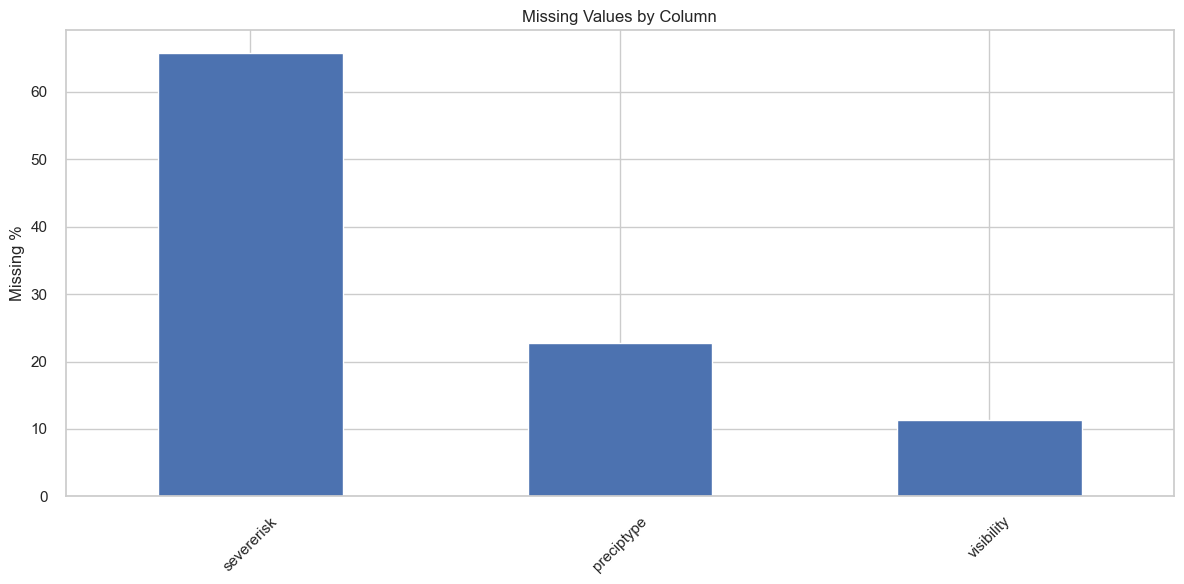

In [87]:
print("MISSING VALUES PER COLUMN")
missing = df.isnull().sum()
missing_percent = np.round(((missing[missing > 0]/df.shape[0])*100),2)
missing_df = pd.DataFrame({
    'Missing Count': missing[missing > 0],
    'Missing %': missing_percent
}).sort_values('Missing %', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")
    
# Visualize missing value patterns
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    missing_df['Missing %'].plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Missing %')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../figures/missing_values_analysis.png', bbox_inches='tight')
    plt.show()

## 2.2. Check Duplicate Rows

In [88]:
# Checks for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# remove duplicates if  exists
if duplicates > 0:
    df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


## 2.3. Proper Date Formatting

In [89]:
# Convert time column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort for time series consistency
df = df.sort_values(['name', 'datetime']).reset_index(drop=True)

## 2.4. Change Temperature Units

In [90]:
# °F -> °C
def f2c(x):
    return round(((x - 32) * 5/9), 2)

temp_cols_f = ["tempmax","tempmin","temp","feelslikemax","feelslikemin","feelslike"]

# create new columns (°C)
for col in temp_cols_f:
    df[col + "_C"] = df[col].apply(f2c)

# Delete °F columns
df = df.drop(columns=temp_cols_f)

# Check
print(df.filter(like="_C").head())

   tempmax_C  tempmin_C  temp_C  feelslikemax_C  feelslikemin_C  feelslike_C
0      28.06      22.06   25.11           29.72           22.06        25.61
1      26.06      20.06   23.72           26.06           20.06        23.72
2      29.06      22.83   25.33           30.89           22.83        25.78
3      30.06      22.06   26.22           33.39           22.06        27.44
4      30.06      24.06   26.28           33.39           24.06        27.50


In [91]:
# Data validation after temperature conversion
print("TEMPERATURE CONVERSION VALIDATION\n")
print(f"Max temperature range: {df['tempmax_C'].min():.1f}°C to {df['tempmax_C'].max():.1f}°C")
print(f"Min temperature range: {df['tempmin_C'].min():.1f}°C to {df['tempmin_C'].max():.1f}°C")
print(f"Average temperature range: {df['temp_C'].min():.1f}°C to {df['temp_C'].max():.1f}°C")

# Check for any unreasonable values
unreasonable_max = ((df['tempmax_C'] < 0) | (df['tempmax_C'] > 60)).sum()
unreasonable_min = ((df['tempmin_C'] < -10) | (df['tempmin_C'] > 50)).sum()
print(f"Unreasonable max temp values: {unreasonable_max}")
print(f"Unreasonable min temp values: {unreasonable_min}")

TEMPERATURE CONVERSION VALIDATION

Max temperature range: 23.4°C to 42.8°C
Min temperature range: 2.0°C to 30.7°C
Average temperature range: 22.0°C to 35.4°C
Unreasonable max temp values: 0
Unreasonable min temp values: 0


## 2.5. Drop Unrelated Columns

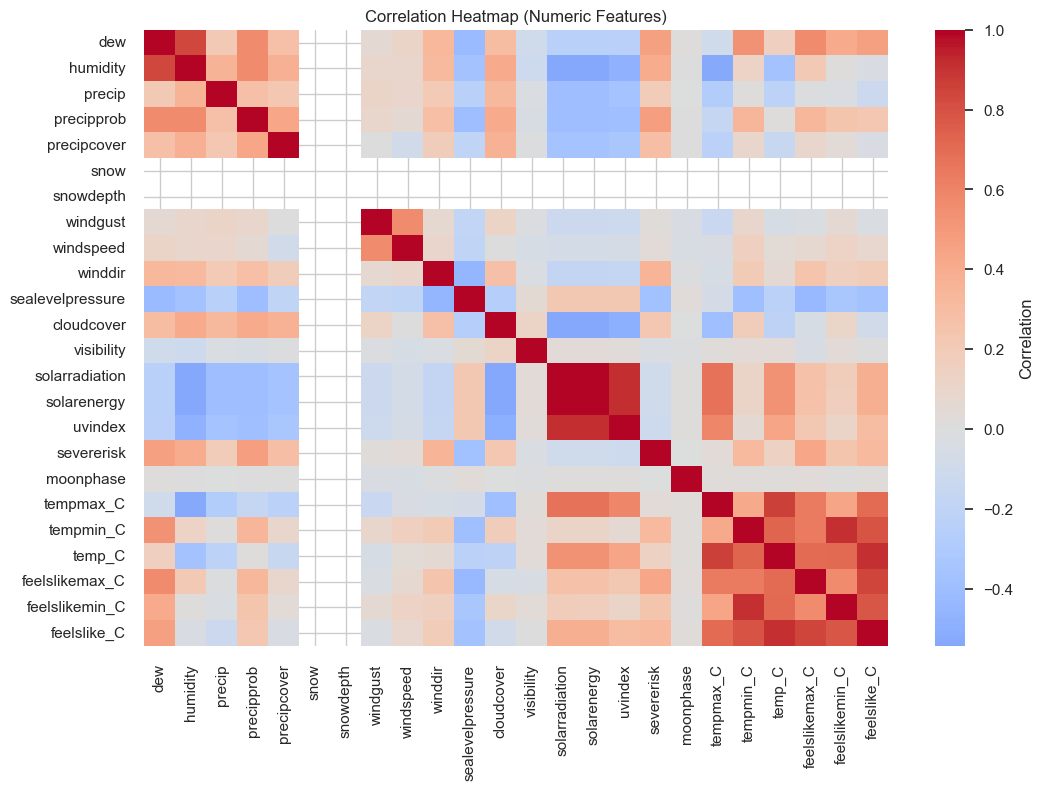

,tempmax_C
tempmax_C,1.000000
temp_C,0.866564
feelslike_C,0.703084
solarradiation,0.670579
solarenergy,0.669626
feelslikemax_C,0.636256
uvindex,0.589054
feelslikemin_C,0.445356
tempmin_C,0.420538
severerisk,0.041152


In [92]:
# choose numeric features
numeric_df = df.select_dtypes(include=["int64", "float64"])

# matrix correlation
corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    corr, cmap="coolwarm", center=0,
    annot=False, cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.savefig('../figures/correlation_heatmap_numeric_features.png', bbox_inches='tight')
plt.show()

# features có tương quan  tempmax_C
display(pd.DataFrame(corr["tempmax_C"].sort_values(ascending=False)))

In [93]:
# Drop columns
print("DROP COLUMNS\n")
drop_cols = [
    # Không có thông tin
    "preciptype", "snow", "snowdepth",

    "precipprob", "precipcover",
    # Trùng hoặc dư thừa thông tin thời gian
    "sunrise", "sunset", "dew",
    "windspeed", "windgust", "feelslikemin_C",

    # Text / metadata không ổn định
    "stations", "icon", "description", "visibility",

    # Các biến ít giá trị cho dự báo nhiệt độ
    "solarenergy",   # gần trùng solarradiation
    "conditions",    # dạng text categorical
    "moonphase",     # ít ảnh hưởng trực tiếp
    "severerisk"     # cảnh báo thiên tai, không dự báo nhiệt độ
]

# Drop cột
df = df.drop(columns=[c for c in drop_cols])

print("Number of columns after drop:", len(df.columns))
print("List of Columns exist:", df.columns.tolist())

DROP COLUMNS

Number of columns after drop: 14
List of Columns exist: ['name', 'datetime', 'humidity', 'precip', 'winddir', 'sealevelpressure', 'cloudcover', 'solarradiation', 'uvindex', 'tempmax_C', 'tempmin_C', 'temp_C', 'feelslikemax_C', 'feelslike_C']


## 2.6. Outlier Detection and Analysis

OUTLIER DETECTION AND ANALYSIS

Outlier Summary Table:


,Column,IQR Outliers,Z-Score Outliers,IQR Range
0,humidity,2105,1074,"[57.15, 103.95]"
1,precip,6597,1398,"[-0.40, 0.67]"
2,winddir,0,0,"[-119.80, 457.80]"
3,sealevelpressure,452,158,"[1004.00, 1015.20]"
4,cloudcover,252,198,"[5.25, 119.25]"
5,solarradiation,1296,446,"[81.55, 349.15]"
6,uvindex,1354,1354,"[4.00, 12.00]"
7,tempmax_C,1560,625,"[27.16, 37.40]"
8,tempmin_C,2786,842,"[21.26, 28.57]"
9,temp_C,1403,568,"[24.18, 31.54]"


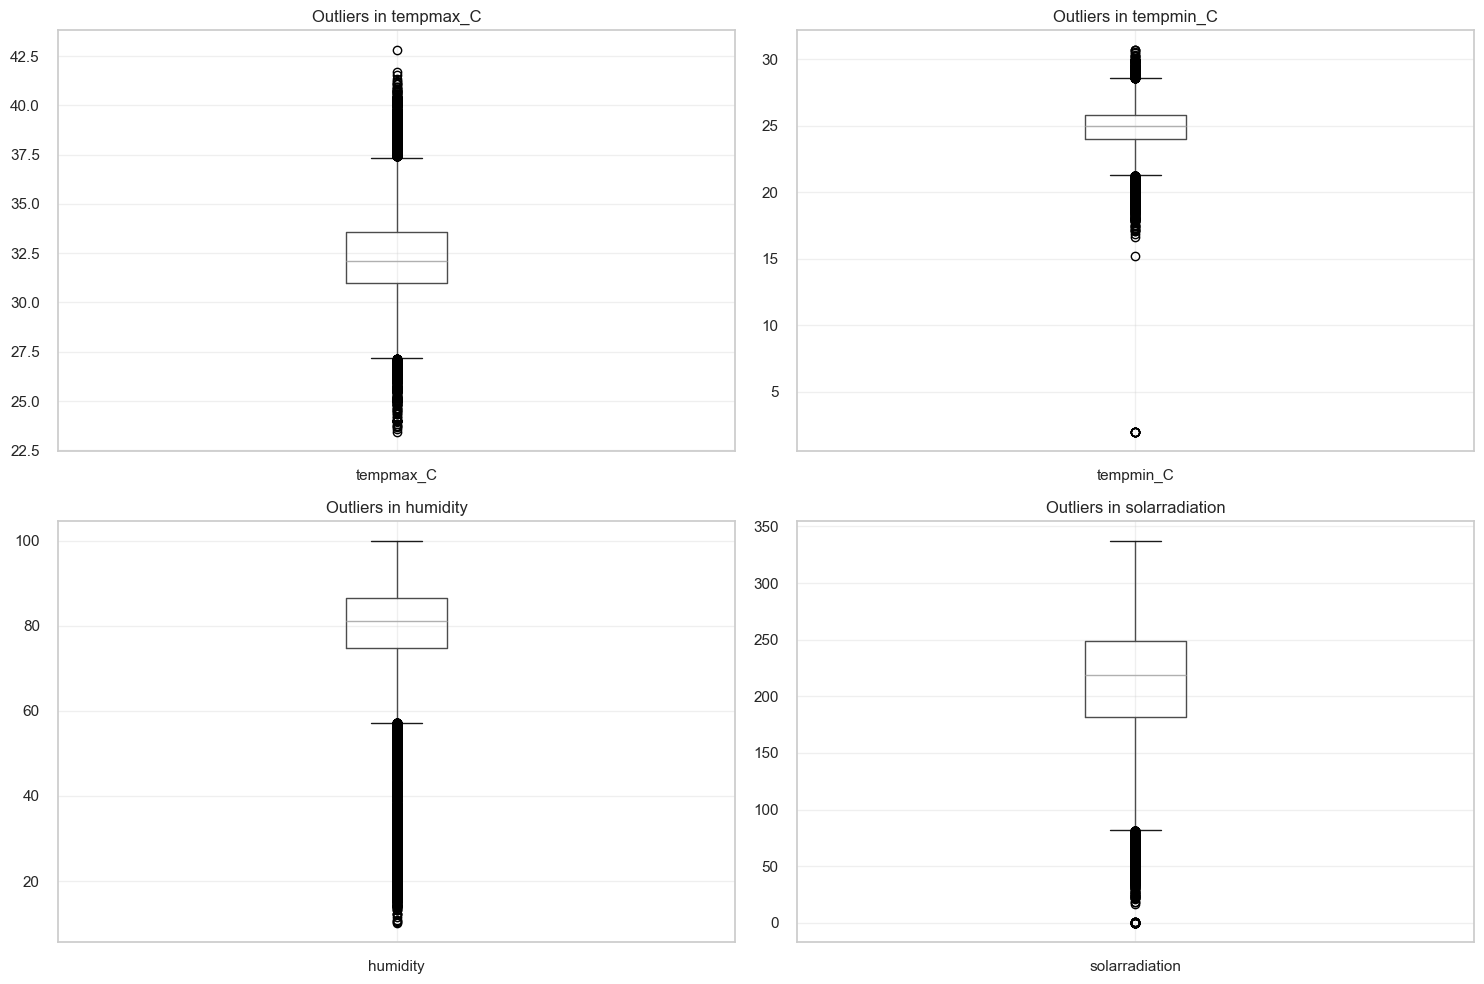

In [94]:
print("OUTLIER DETECTION AND ANALYSIS")

def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(df, column, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > threshold]
    return outliers

# Analyze outliers for key numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_summary = []

for col in numeric_cols:
    if col in ['name', 'datetime']:  # Skip non-numeric columns
        continue
        
    # IQR method
    outliers_iqr, lower, upper = detect_outliers_iqr(df, col)
    n_outliers_iqr = len(outliers_iqr)
    
    # Z-score method
    outliers_zscore = detect_outliers_zscore(df, col)
    n_outliers_zscore = len(outliers_zscore)
    
    outlier_summary.append({
        'Column': col,
        'IQR Outliers': n_outliers_iqr,
        'Z-Score Outliers': n_outliers_zscore,
        'IQR Range': f"[{lower:.2f}, {upper:.2f}]"
    })
    
outlier_df = pd.DataFrame(outlier_summary)
print(f"\nOutlier Summary Table:")
display(outlier_df)

# Visualize outliers for key temperature columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

key_cols = ['tempmax_C', 'tempmin_C', 'humidity', 'solarradiation']

for i, col in enumerate(key_cols):
    if col in df.columns:
        # Box plot to show outliers
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Outliers in {col}')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('../figures/outlier_analysis.png', bbox_inches='tight')
plt.show()


## 2.7. Data Quality Metrics

In [95]:
print("COMPREHENSIVE DATA QUALITY ASSESSMENT")
def data_quality_report(df):
    quality_metrics = {}
    
    for col in df.columns:
        # Completeness (non-null percentage)
        completeness = (1 - df[col].isnull().sum() / len(df)) * 100
        
        # Uniqueness (unique values percentage)
        uniqueness = df[col].nunique() / len(df) * 100
        
        # Validity (for numeric columns, check for reasonable ranges)
        validity = 100  # Default
        if col in ['tempmax_C', 'tempmin_C']:
            # Temperature should be between 0°C and 50°C
            valid_temp = ((df[col] >= 0) & (df[col] <= 50)).sum()
            validity = (valid_temp / len(df)) * 100
        elif col == 'humidity':
            # Humidity should be between 0% and 100%
            valid_humidity = ((df[col] >= 0) & (df[col] <= 100)).sum()
            validity = (valid_humidity / len(df)) * 100
        elif col == 'precip':
            # Precipitation should be non-negative
            valid_precip = (df[col] >= 0).sum()
            validity = (valid_precip / len(df)) * 100
        
        quality_metrics[col] = {
            'Completeness (%)': round(completeness, 2),
            'Uniqueness (%)': round(uniqueness, 2),
            'Validity (%)': round(validity, 2)
        }
    
    return pd.DataFrame(quality_metrics).T

# Generate quality report
quality_report = data_quality_report(df)
print("Data Quality Metrics:")
display(quality_report)

# Overall quality score
overall_completeness = quality_report['Completeness (%)'].mean()
overall_uniqueness = quality_report['Uniqueness (%)'].mean()
overall_validity = quality_report['Validity (%)'].mean()

print(f"\nOverall Data Quality Scores:")
print(f"  Completeness: {overall_completeness:.2f}%")
print(f"  Uniqueness: {overall_uniqueness:.2f}%")
print(f"  Validity: {overall_validity:.2f}%")



COMPREHENSIVE DATA QUALITY ASSESSMENT
Data Quality Metrics:


,Completeness (%),Uniqueness (%),Validity (%)
name,100.0,0.03,100.0
datetime,100.0,5.56,100.0
humidity,100.0,1.22,100.0
precip,100.0,2.48,100.0
winddir,100.0,5.13,100.0
sealevelpressure,100.0,0.23,100.0
cloudcover,100.0,1.42,100.0
solarradiation,100.0,3.93,100.0
uvindex,100.0,0.02,100.0
tempmax_C,100.0,0.40,100.0



Overall Data Quality Scores:
  Completeness: 100.00%
  Uniqueness: 1.59%
  Validity: 100.00%


Data Consistency Checks:
Temperature consistency (max >= min): True
Non-negative precipitation: True
Humidity in valid range (0-100%): True
Non-negative solar radiation: True
Wind direction in valid range (0-360°): True


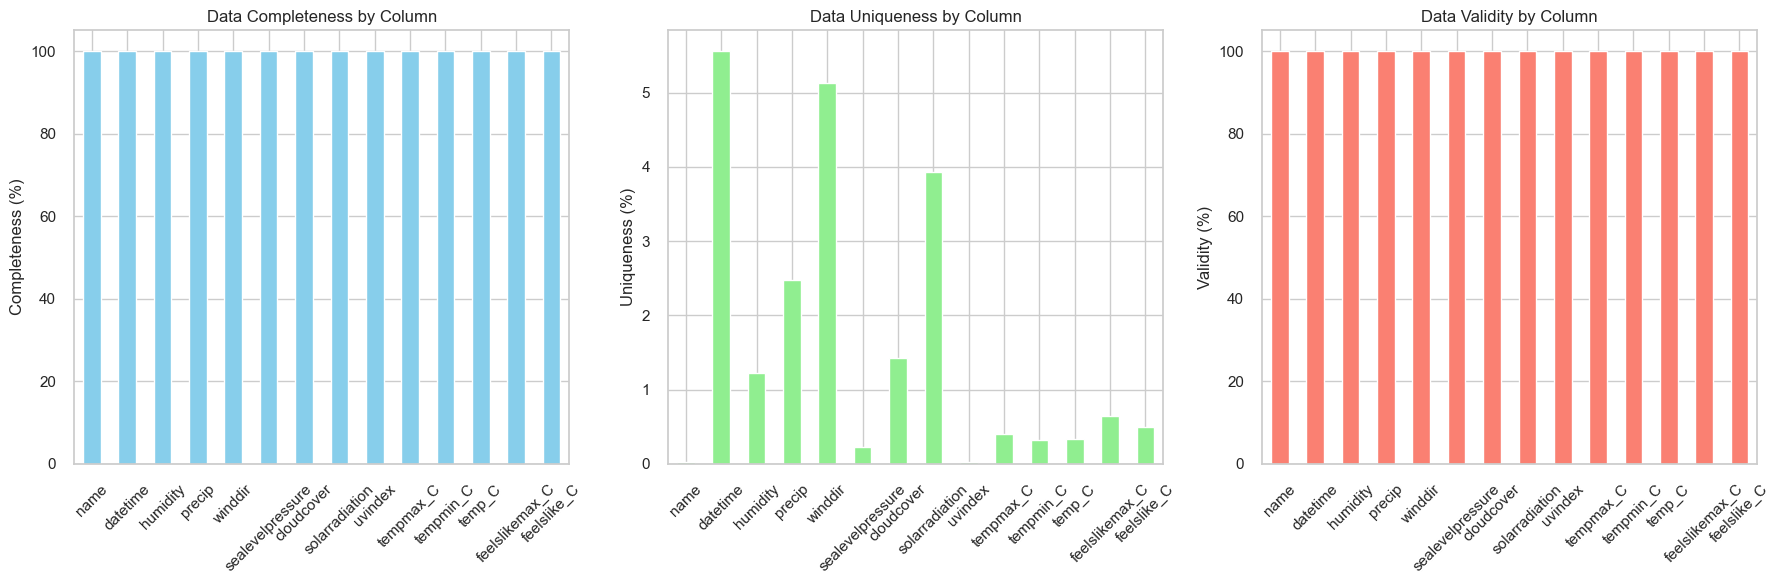

In [96]:
print(f"Data Consistency Checks:")

# Check 1: Max temp >= Min temp
temp_consistency = (df['tempmax_C'] >= df['tempmin_C']).all()
print(f"Temperature consistency (max >= min): {temp_consistency}")

# Check 2: No negative precipitation
precip_consistency = (df['precip'] >= 0).all()
print(f"Non-negative precipitation: {precip_consistency}")

# Check 3: Humidity in valid range
humidity_consistency = ((df['humidity'] >= 0) & (df['humidity'] <= 100)).all()
print(f"Humidity in valid range (0-100%): {humidity_consistency}")

# Check 4: Solar radiation non-negative
solar_consistency = (df['solarradiation'] >= 0).all()
print(f"Non-negative solar radiation: {solar_consistency}")

# Check 5: Wind direction in valid range (0-360)
wind_consistency = ((df['winddir'] >= 0) & (df['winddir'] <= 360)).all()
print(f"Wind direction in valid range (0-360°): {wind_consistency}")

# Visualize quality metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Completeness
quality_report['Completeness (%)'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Data Completeness by Column')
axes[0].set_ylabel('Completeness (%)')
axes[0].tick_params(axis='x', rotation=45)

# Uniqueness
quality_report['Uniqueness (%)'].plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Data Uniqueness by Column')
axes[1].set_ylabel('Uniqueness (%)')
axes[1].tick_params(axis='x', rotation=45)

# Validity
quality_report['Validity (%)'].plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Data Validity by Column')
axes[2].set_ylabel('Validity (%)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
# plt.savefig('../figures/data_quality_metrics.png', bbox_inches='tight')
plt.show()


In [97]:
print('Dataset Shape after Cleaning:', df.shape)


Dataset Shape after Cleaning: (70146, 14)


# **3. Exploratory Data Analysis (EDA)**

In [98]:
# Check data types and unique values
print("DATA TYPES AND UNIQUE VALUES\n")
for col in df.columns:
    print(f"{col}: {df[col].dtype}, Unique values: {df[col].nunique()}")

DATA TYPES AND UNIQUE VALUES

name: object, Unique values: 18
datetime: datetime64[ns], Unique values: 3897
humidity: float64, Unique values: 854
precip: float64, Unique values: 1739
winddir: float64, Unique values: 3595
sealevelpressure: float64, Unique values: 158
cloudcover: float64, Unique values: 994
solarradiation: float64, Unique values: 2755
uvindex: int64, Unique values: 11
tempmax_C: float64, Unique values: 284
tempmin_C: float64, Unique values: 226
temp_C: float64, Unique values: 233
feelslikemax_C: float64, Unique values: 450
feelslike_C: float64, Unique values: 352


In [99]:
print(f"Rows: {len(df)}")
print(f"Columns: {df.shape[1]}")
print(f"Provinces: {df['name'].nunique()}")
print(f"Date range: {df['datetime'].min().date()} -> {df['datetime'].max().date()}")

Rows: 70146
Columns: 14
Provinces: 18
Date range: 2015-01-01 -> 2025-09-01


In [100]:
print("BASIC STATISTICS")
df.describe().T

BASIC STATISTICS


,count,mean,min,25%,50%,75%,max,std
datetime,70146,2020-05-02 00:00:00.000000256,2015-01-01 00:00:00,2017-09-01 00:00:00,2020-05-02 00:00:00,2023-01-01 00:00:00,2025-09-01 00:00:00,NaN
humidity,70146.0,79.435576,10.2,74.7,81.1,86.4,100.0,10.7354
precip,70146.0,0.231279,0.0,0.004,0.043,0.272,9.047,0.47077
winddir,70146.0,171.269884,0.0,96.8,180.6,241.2,360.0,84.988818
sealevelpressure,70146.0,1009.599842,994.8,1008.2,1009.5,1011.0,1017.1,2.072952
cloudcover,70146.0,62.092575,0.0,48.0,60.2,76.5,100.0,19.631561
solarradiation,70146.0,211.036997,0.0,181.9,219.0,248.8,337.5,50.941411
uvindex,70146.0,7.701508,0.0,7.0,8.0,9.0,10.0,1.542443
tempmax_C,70146.0,32.259048,23.44,31.0,32.11,33.56,42.83,2.066956
tempmin_C,70146.0,24.720782,2.0,24.0,25.0,25.83,30.72,1.554585


## 3.1. Distribution
We visualize how temperature and humidity values are distributed across the dataset to understand the general climate variation

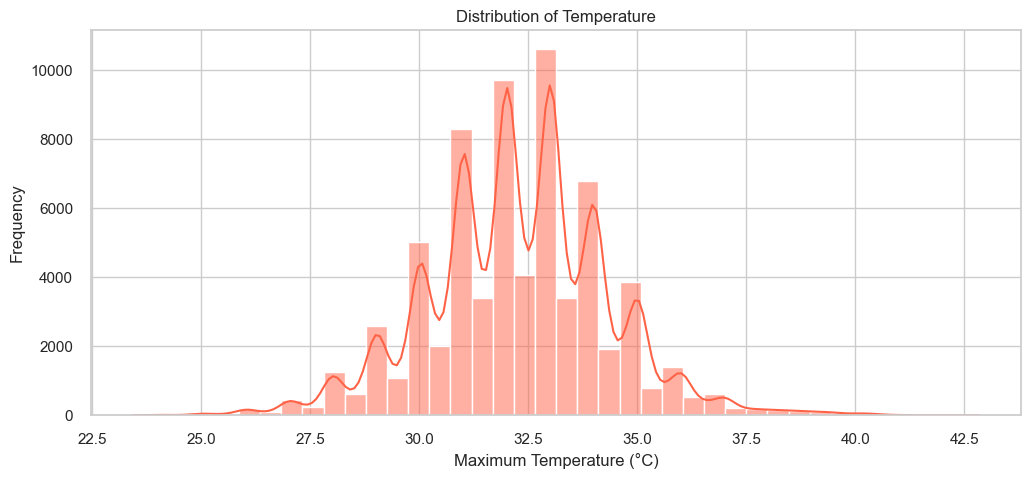

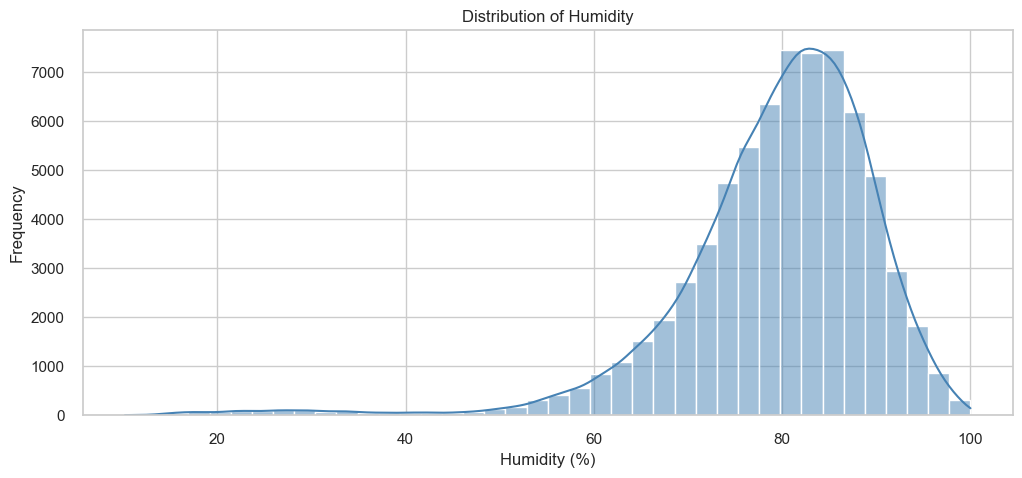

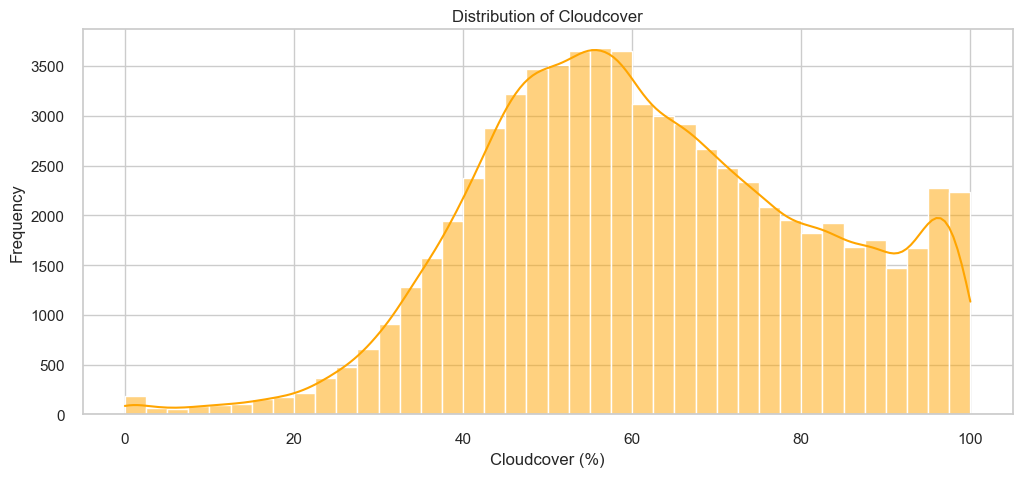

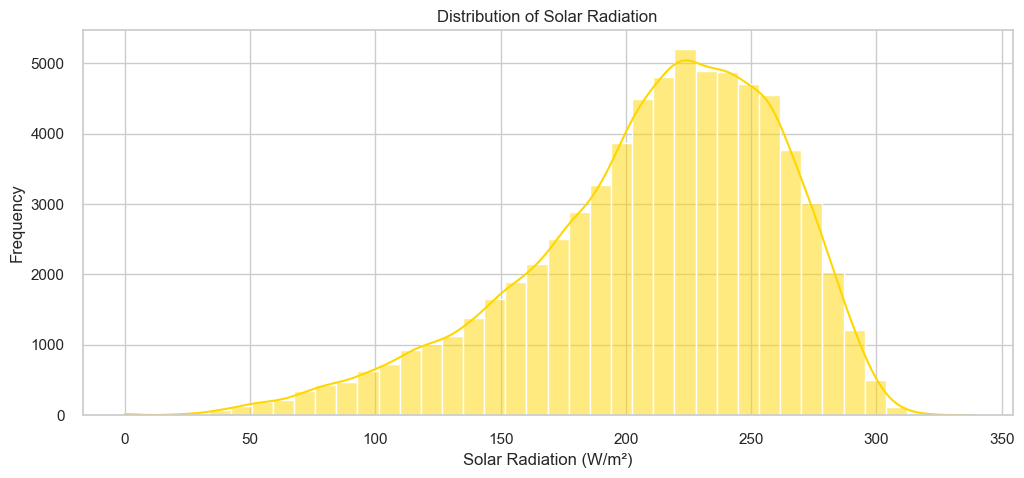

In [101]:
# Temperature distribution
plt.figure(figsize=(12,5))
sns.histplot(df['tempmax_C'], bins=40, kde=True, color='tomato')
plt.title('Distribution of Temperature')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Frequency')
plt.savefig('../figures/temperature_distribution.png', bbox_inches='tight')
plt.show()

# Humidity distribution
plt.figure(figsize=(12,5))
sns.histplot(df['humidity'], bins=40, kde=True, color='steelblue')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.savefig('../figures/humidity_distribution.png', bbox_inches='tight')
plt.show()

# Cloudcover distribution
plt.figure(figsize=(12,5))
sns.histplot(df['cloudcover'], bins=40, kde=True, color='orange')
plt.title('Distribution of Cloudcover')
plt.xlabel('Cloudcover (%)')
plt.ylabel('Frequency')
plt.savefig('../figures/cloudcover_distribution.png', bbox_inches='tight')
plt.show()

# Solarradiation distribution
plt.figure(figsize=(12,5))
sns.histplot(df['solarradiation'], bins=40, kde=True, color='gold')
plt.title('Distribution of Solar Radiation')
plt.xlabel('Solar Radiation (W/m²)')
plt.ylabel('Frequency')
plt.savefig('../figures/solarradiation_distribution.png', bbox_inches='tight')
plt.show()

## 3.2. Average Maximum Temperature by Province

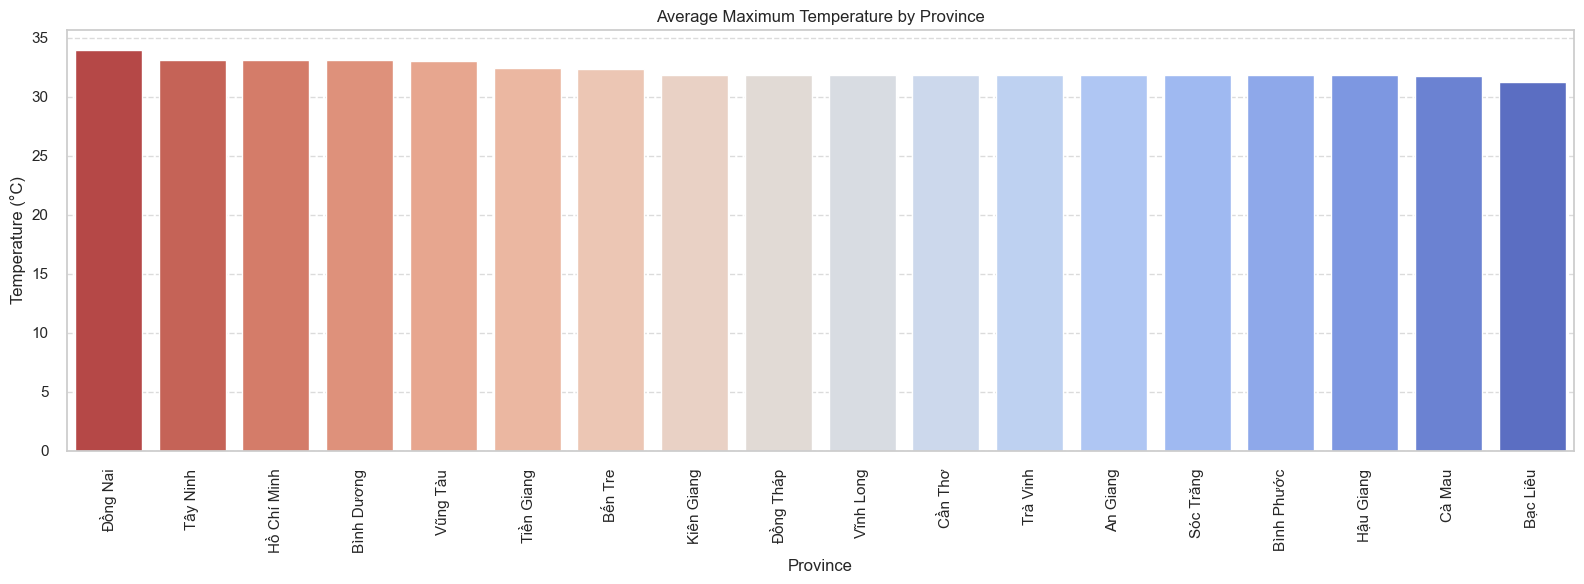

In [102]:
# Compute average temperature per province
avg_max_temp = df.groupby('name')['tempmax_C'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(16,6))
sns.barplot(x=avg_max_temp.index, y=avg_max_temp.values, palette="coolwarm_r")
plt.title('Average Maximum Temperature by Province')
plt.ylabel('Temperature (°C)')
plt.xlabel('Province')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../figures/average_max_temp_by_province.png', bbox_inches='tight')
plt.show()

## 3.3. Average Maximum Temperature by Month

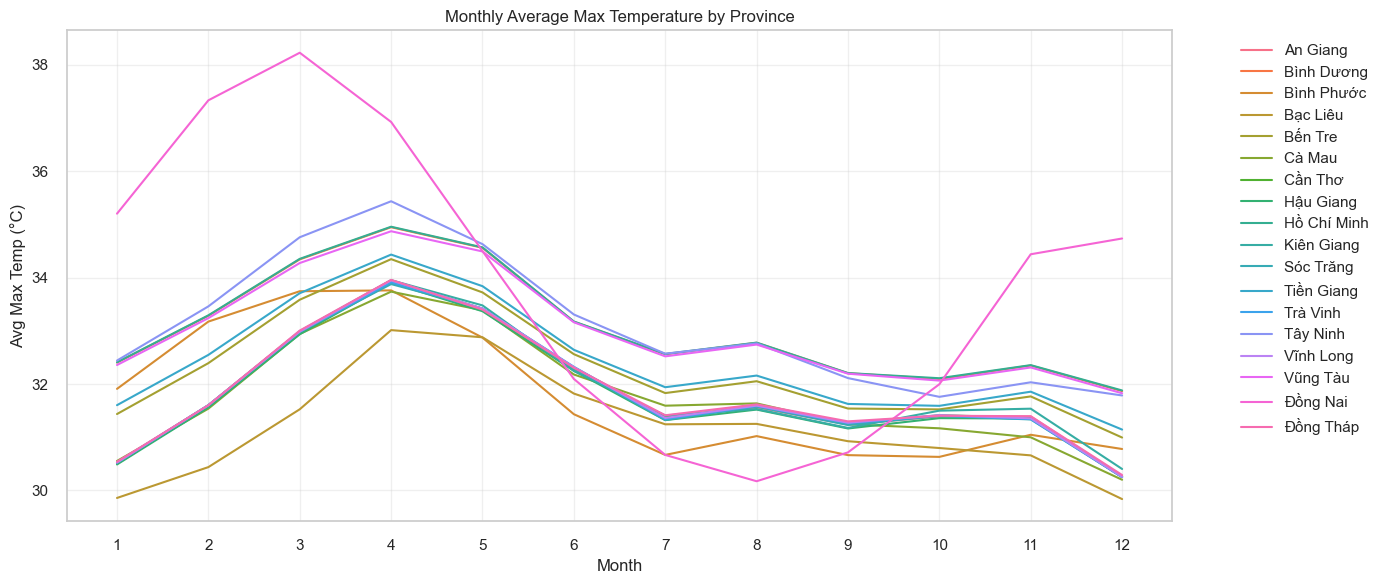

In [103]:
monthly_province_avg = (
    df.groupby([df['name'], df['datetime'].dt.month])['tempmax_C']
      .mean().reset_index()
)

plt.figure(figsize=(14,6))
sns.lineplot(
    data=monthly_province_avg,
    x='datetime', y='tempmax_C', hue='name'
)
plt.title("Monthly Average Max Temperature by Province")
plt.xlabel("Month")
plt.ylabel("Avg Max Temp (°C)")
plt.grid(alpha=0.3)
plt.xticks(range(1,13))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../figures/monthly_average_max_temp_by_province.png', bbox_inches='tight')
plt.show()

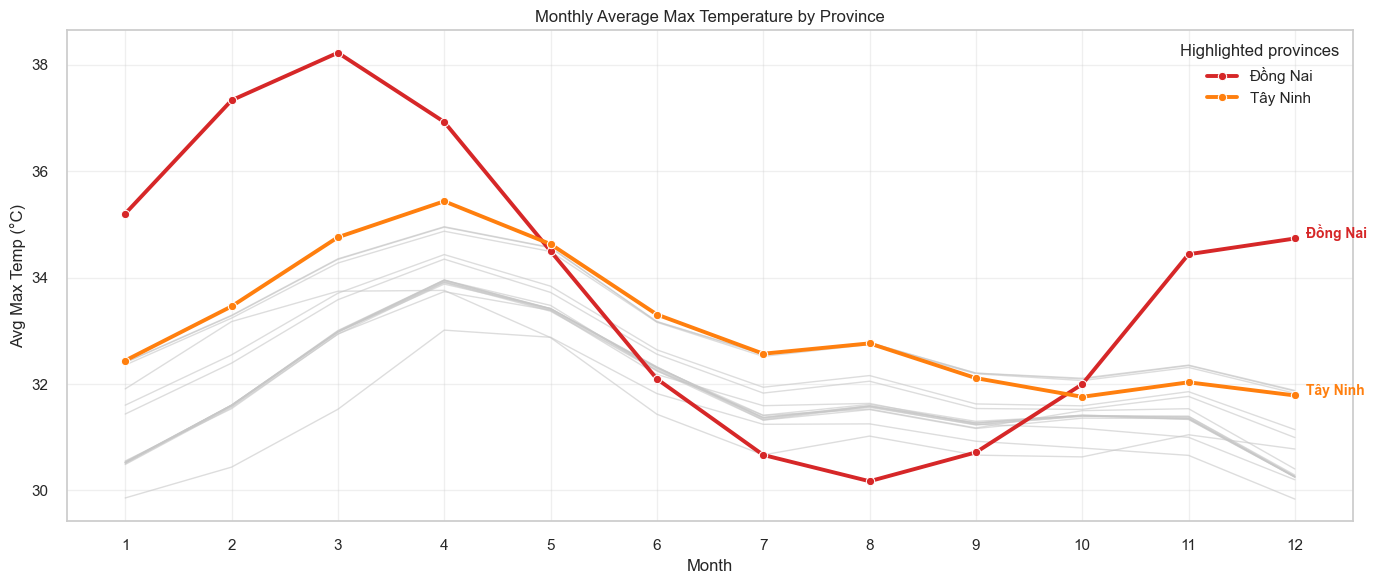

In [104]:
# Tính trung bình theo tỉnh để tìm 2 tỉnh nóng nhất
monthly_province_avg = (
    df.assign(month=df['datetime'].dt.month)
      .groupby(['name','month'])['tempmax_C']
      .mean().reset_index()
)

# Lấy 2 tỉnh nóng nhất
top2 = (monthly_province_avg.groupby('name')['tempmax_C']
        .mean().sort_values(ascending=False).head(2).index.tolist())

plt.figure(figsize=(14,6))

# Vẽ tất cả tỉnh khác bằng màu xám nhạt
sns.lineplot(
    data=monthly_province_avg[~monthly_province_avg['name'].isin(top2)],
    x='month', y='tempmax_C', hue='name',
    palette=['#C7C7C7'],     # xám nhạt
    linewidth=1, alpha=0.6, legend=False
)

# Vẽ 2 tỉnh nóng nhất với màu nổi (đỏ & cam)
highlight_colors = ['#d62728', '#ff7f0e']   # đỏ & cam

for i, prov in enumerate(top2):
    sub = monthly_province_avg[monthly_province_avg['name'] == prov]
    sns.lineplot(
        data=sub, x='month', y='tempmax_C',
        color=highlight_colors[i], linewidth=2.8, marker='o', label=prov, zorder=3
    )
    # Ghi nhãn tên tỉnh ở điểm cuối
    last = sub.sort_values('month').iloc[-1]
    plt.text(last['month']+0.1, last['tempmax_C'],
             prov, color=highlight_colors[i], fontsize=10, weight='bold')

plt.title("Monthly Average Max Temperature by Province")
plt.xlabel("Month"); plt.ylabel("Avg Max Temp (°C)")
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.legend(title="Highlighted provinces", loc='upper right')
plt.tight_layout()
plt.savefig('../figures/monthly_average_max_temp_by_province.png', bbox_inches='tight')
plt.show()

## 3.4. Heat Map of Average Maximum Temperature (Year x Month)

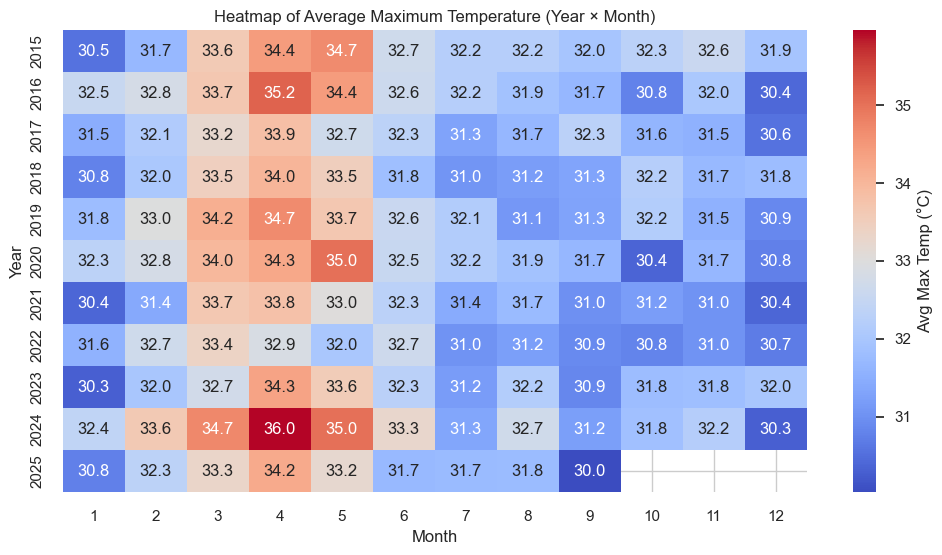

In [105]:
# Tạo bảng pivot: hàng = year, cột = month, giá trị = nhiệt độ TB
heatmap_data = (
    df.groupby([df['datetime'].dt.year, df['datetime'].dt.month])['tempmax_C']
      .mean()
      .unstack()
)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Avg Max Temp (°C)'}
)
plt.title("Heatmap of Average Maximum Temperature (Year × Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.savefig('../figures/heatmap_average_max_temp_by_year_month.png', bbox_inches='tight')
plt.show()

## 3.5. Violin Plot across Province

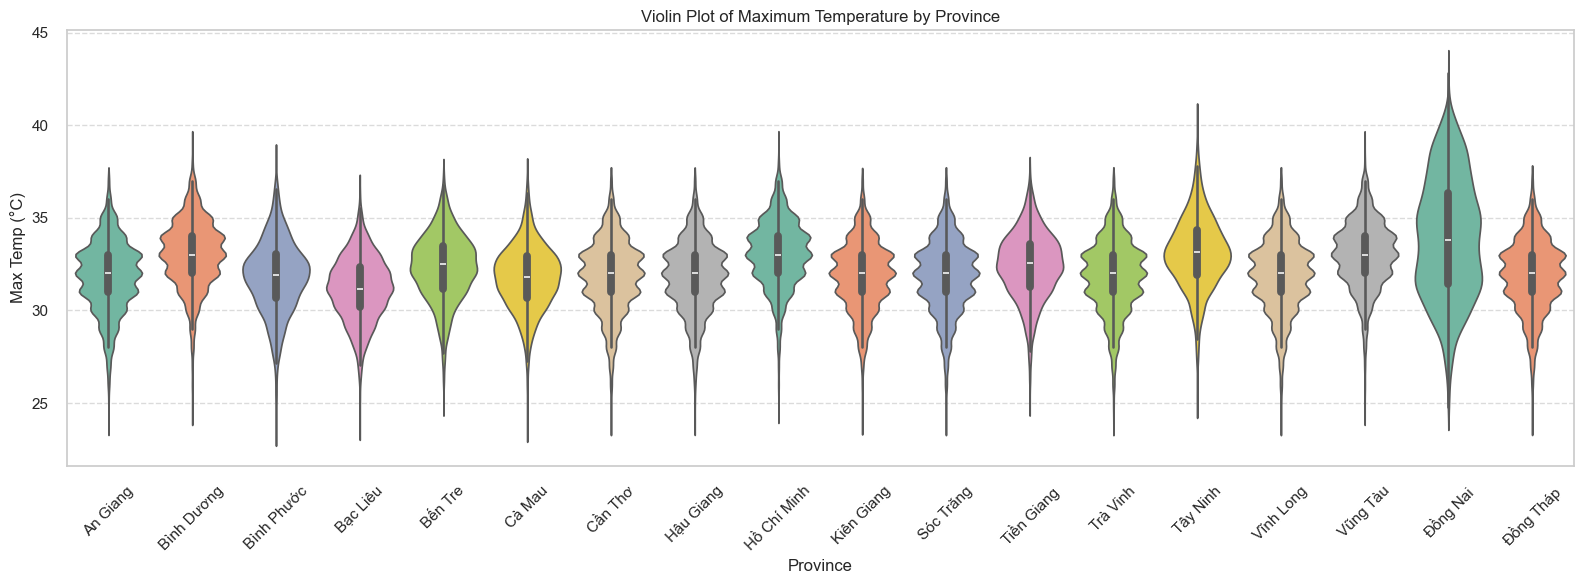

In [106]:
# Violin plot: phân phối dạng density
plt.figure(figsize=(16,6))
sns.violinplot(
    data=df,
    x="name", y="tempmax_C",
    palette="Set2", inner="box"   # inner="box" để thấy median + quartile
)
plt.xticks(rotation=45)
plt.title("Violin Plot of Maximum Temperature by Province")
plt.xlabel("Province")
plt.ylabel("Max Temp (°C)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig('../figures/violin_plot_max_temp_by_province.png', bbox_inches='tight')
plt.show()

## 3.6. Scatter Plot

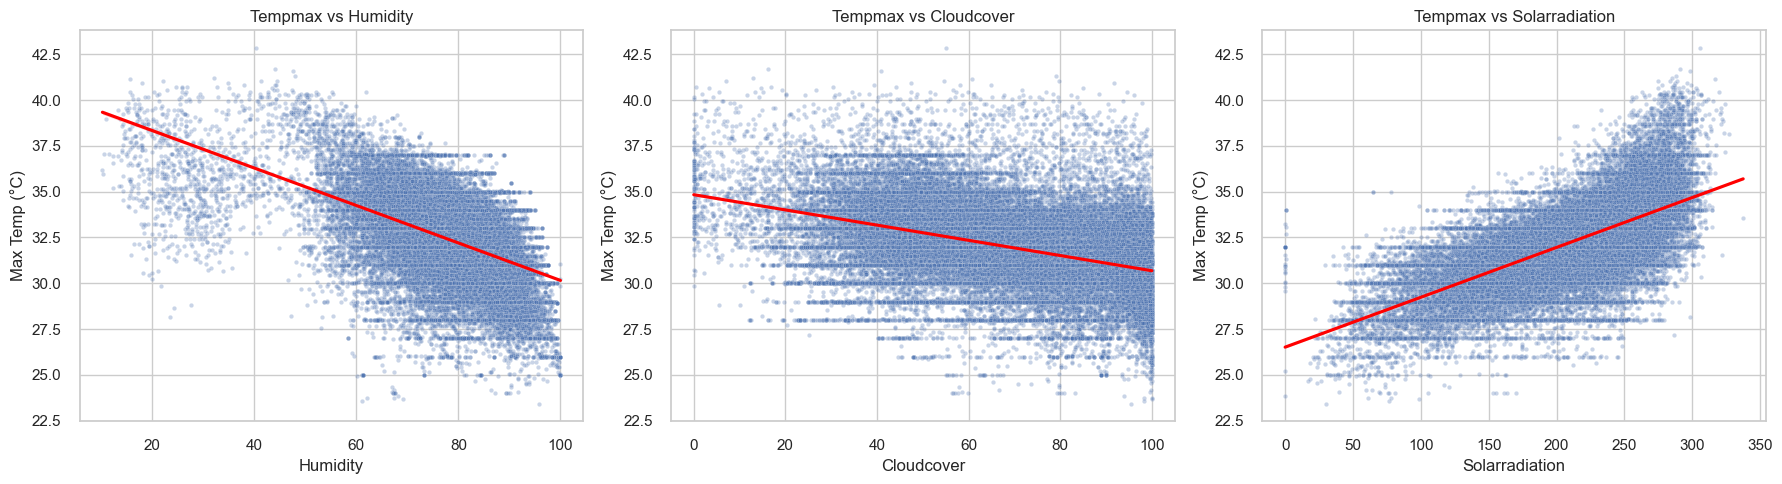

In [107]:
features = ["humidity", "cloudcover", "solarradiation"]

plt.figure(figsize=(18,5))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=col, y="tempmax_C", alpha=0.3, s=10)
    sns.regplot(data=df, x=col, y="tempmax_C", scatter=False, color="red")
    plt.title(f"Tempmax vs {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Max Temp (°C)")

plt.tight_layout()
plt.savefig('../figures/scatter_plot_tempmax_vs_features.png', bbox_inches='tight')
plt.show()

## 3.7 Correlation Heatmap

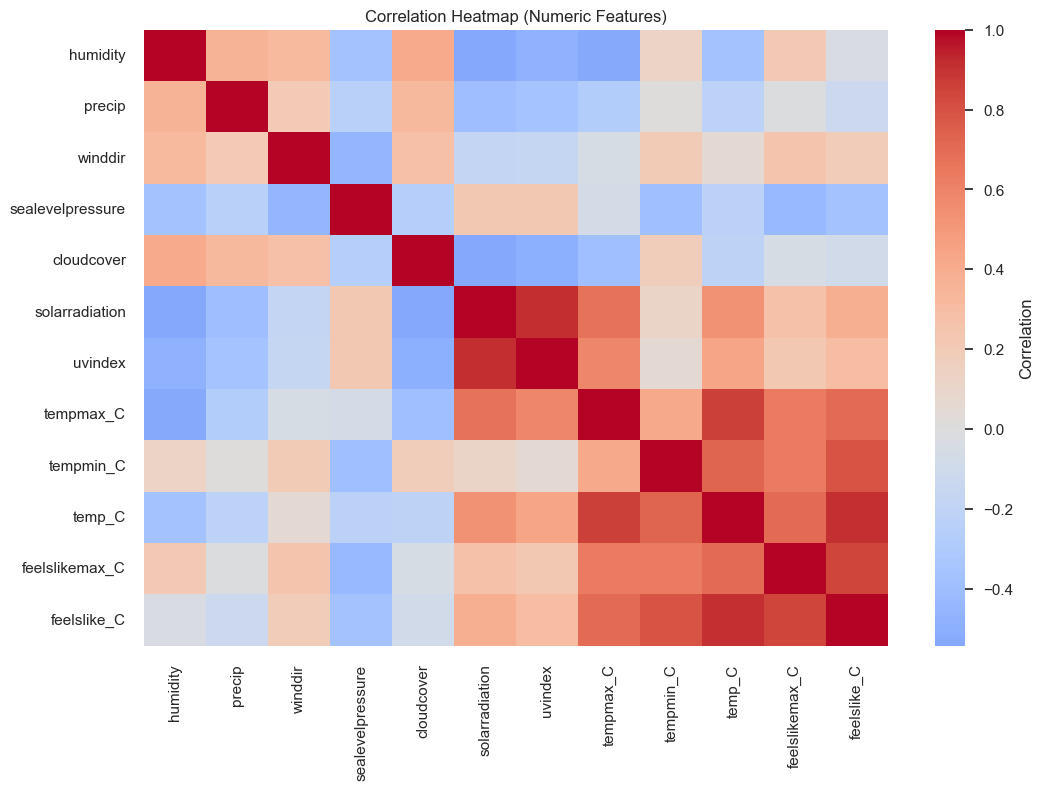

tempmax_C           1.000000
temp_C              0.866564
feelslike_C         0.703084
solarradiation      0.670579
feelslikemax_C      0.636256
uvindex             0.589054
tempmin_C           0.420538
winddir            -0.047334
sealevelpressure   -0.066443
precip             -0.272266
cloudcover         -0.394009
humidity           -0.530779
Name: tempmax_C, dtype: float64


In [108]:
# choose numeric features
numeric_df = df.select_dtypes(include=["int64", "float64"])

# matrix correlation
corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    corr, cmap="coolwarm", center=0,
    annot=False, cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.savefig('../figures/correlation_heatmap_numeric_features.png', bbox_inches='tight')
plt.show()

# top 10 feature có tương quan cao nhất với tempmax_C
print(corr["tempmax_C"].sort_values(ascending=False))

## 3.8 Time Series Analysis

TIME SERIES ANALYSIS
Temporal Features Added:
  Year range: 2015 - 2025
  Month range: 1 - 12
  Day of year range: 1 - 366


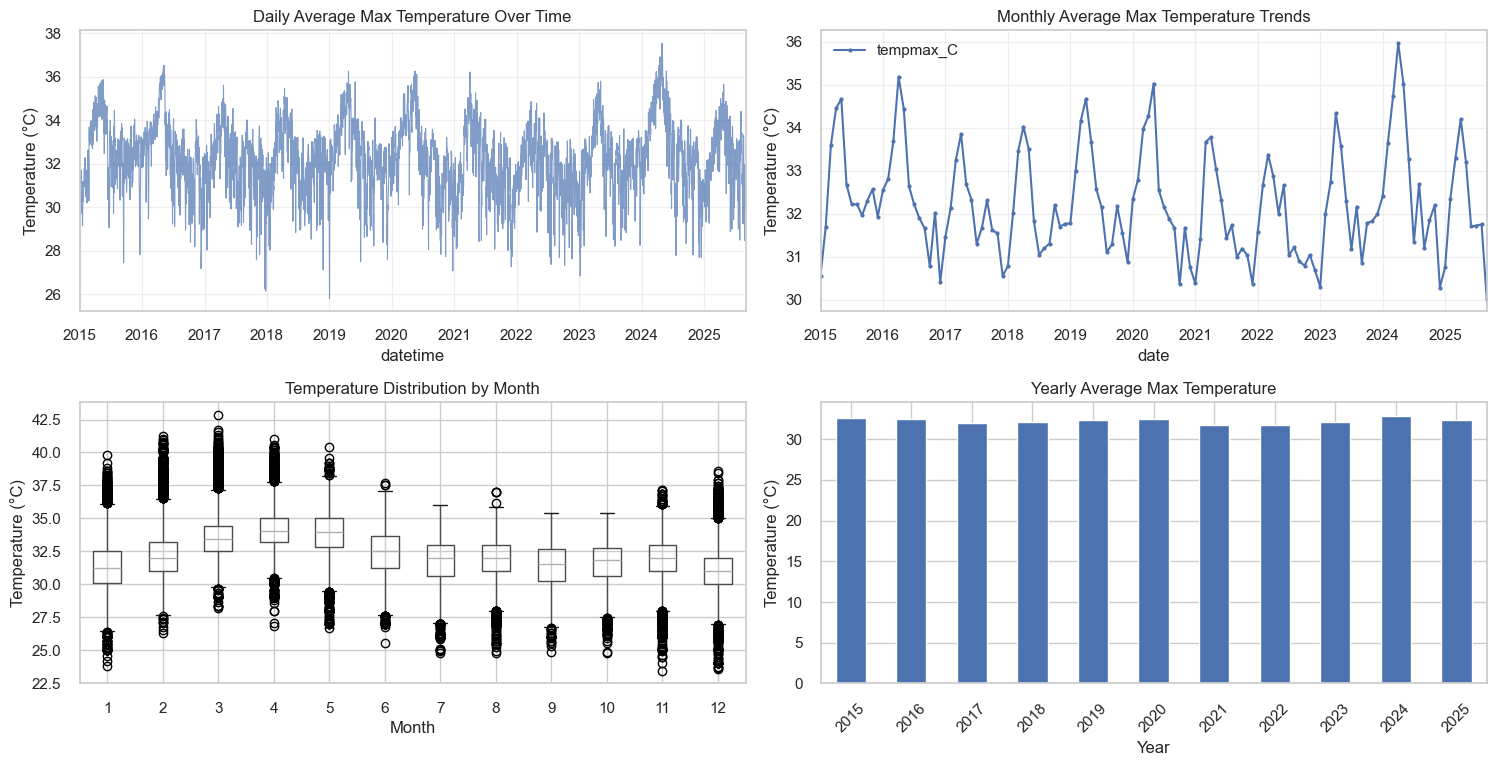


Seasonal Decomposition Analysis:


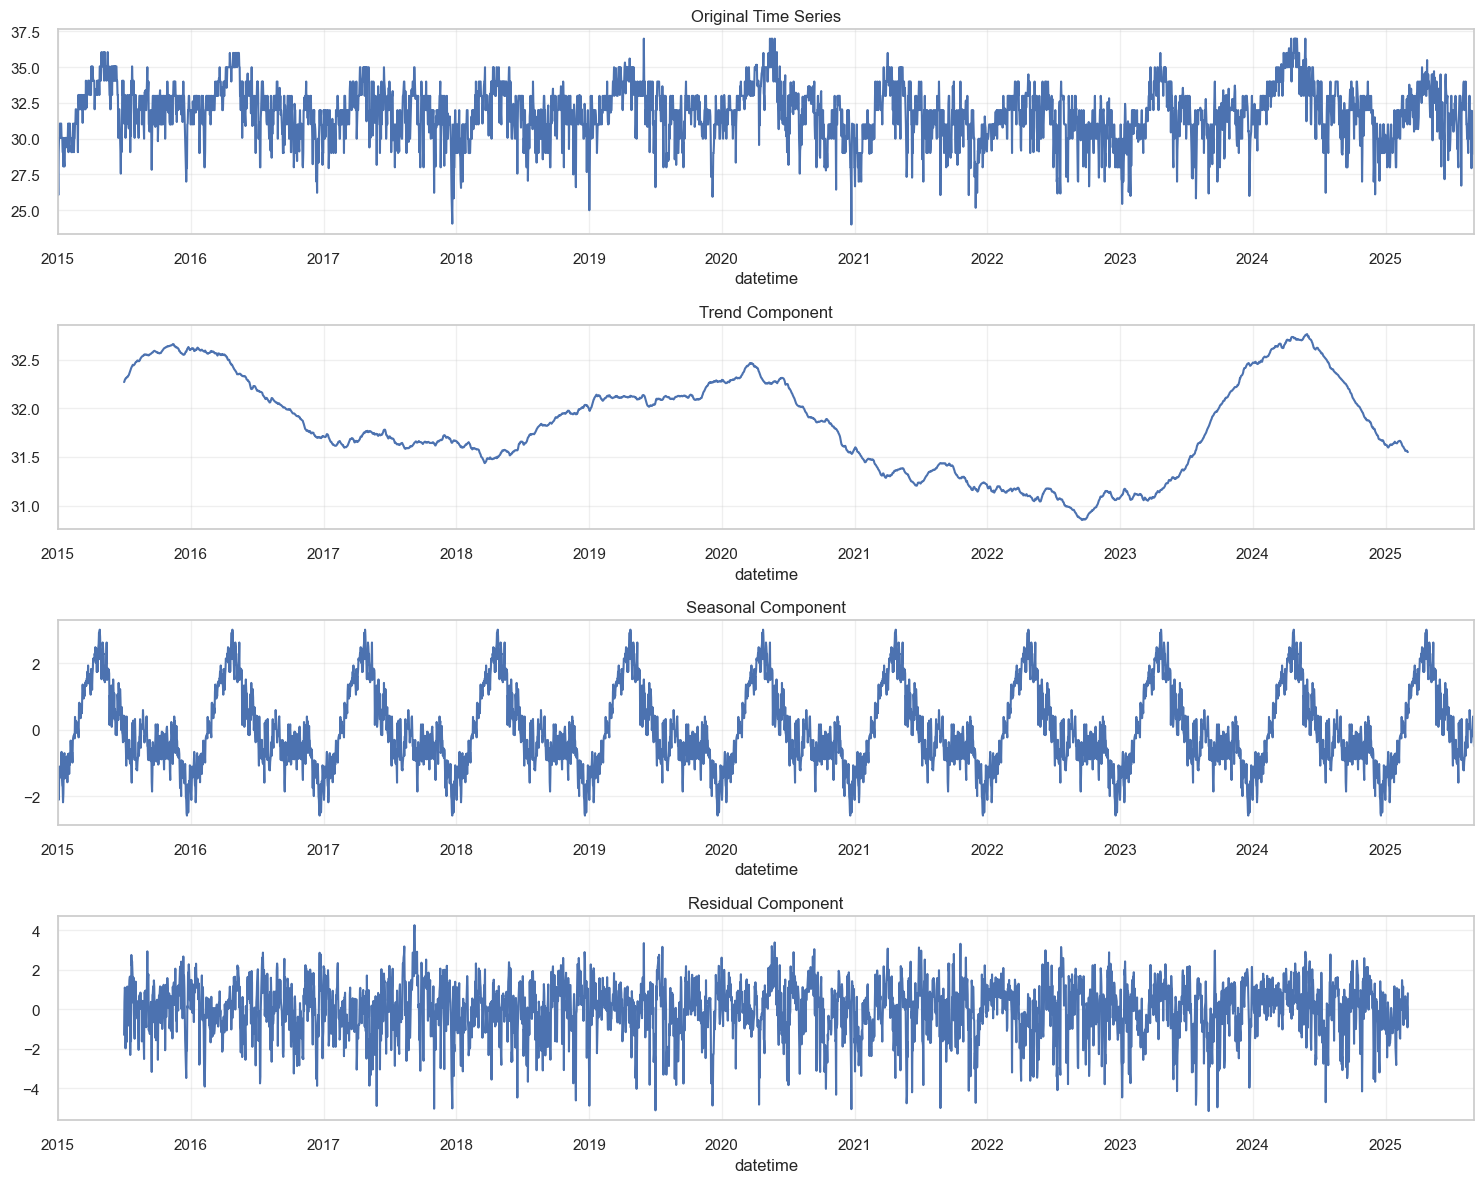

Seasonal decomposition completed for An Giang
  Trend: Decreasing
  Seasonal amplitude: 1.18°C

Autocorrelation Analysis:


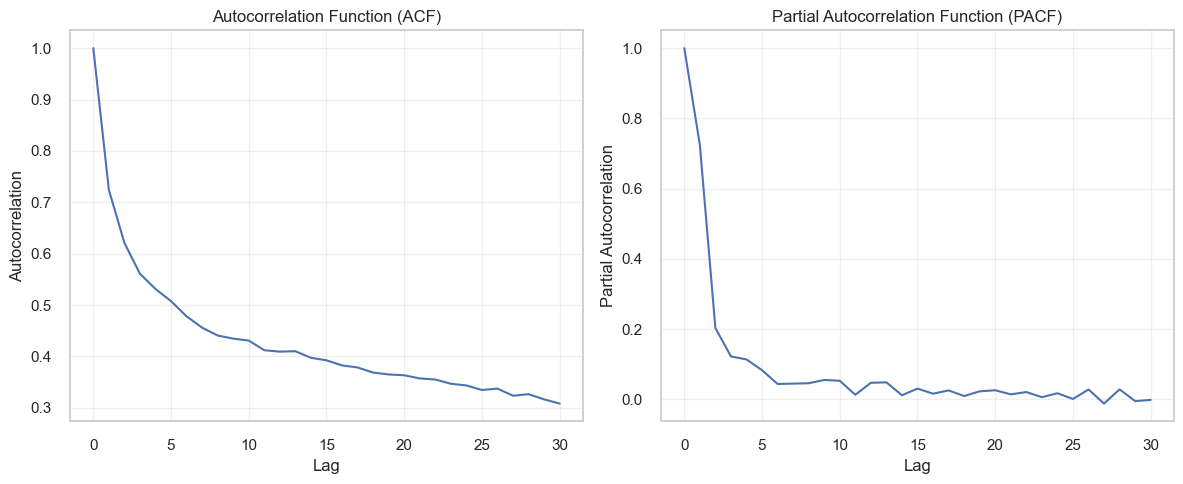

Significant autocorrelation lags: [0, 1, 2, 3, 4]

Temperature Statistics by Time Periods:
Yearly Statistics:


,mean,std,min,max
year,,,,
2015,32.57,1.91,24.83,40.67
2016,32.52,2.11,24.67,40.83
2017,32.05,1.97,23.56,41.06
2018,32.07,1.91,23.83,40.94
2019,32.41,2.01,23.44,39.83



Monthly Statistics:


,mean,std,min,max
month,,,,
1,31.35,2.00,23.83,39.78
2,32.41,1.99,26.33,41.22
3,33.63,1.79,28.17,42.83
4,34.33,1.67,26.83,41.06
5,33.71,1.86,26.67,40.44
6,32.44,1.67,25.56,37.67
7,31.62,1.72,24.78,36.00
8,31.77,1.61,24.78,37.00
9,31.41,1.67,24.83,35.44



Quarterly Statistics:


,mean,std,min,max
quarter,,,,
1,32.47,2.15,23.83,42.83
2,33.49,1.90,25.56,41.06
3,31.61,1.67,24.78,37.00
4,31.39,1.81,23.44,38.56


In [109]:
print("TIME SERIES ANALYSIS")

# Add temporal features for analysis
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_year'] = df['datetime'].dt.dayofyear
df['day_of_week'] = df['datetime'].dt.dayofweek
df['quarter'] = df['datetime'].dt.quarter

print("Temporal Features Added:")
print(f"  Year range: {df['year'].min()} - {df['year'].max()}")
print(f"  Month range: {df['month'].min()} - {df['month'].max()}")
print(f"  Day of year range: {df['day_of_year'].min()} - {df['day_of_year'].max()}")

# 1. Temperature trends over time
plt.figure(figsize=(15, 8))

# Daily average temperature over time
daily_avg = df.groupby('datetime')['tempmax_C'].mean()
plt.subplot(2, 2, 1)
daily_avg.plot(alpha=0.7, linewidth=0.8)
plt.title('Daily Average Max Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)

# Monthly average temperature trends
monthly_avg = df.groupby(['year', 'month'])['tempmax_C'].mean().reset_index()
monthly_avg['date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(day=1))
plt.subplot(2, 2, 2)
monthly_avg.plot(x='date', y='tempmax_C', ax=plt.gca(), marker='o', markersize=3)
plt.title('Monthly Average Max Temperature Trends')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)

# Seasonal patterns (monthly box plot)
plt.subplot(2, 2, 3)
df.boxplot(column='tempmax_C', by='month', ax=plt.gca())
plt.title('Temperature Distribution by Month')
plt.ylabel('Temperature (°C)')
plt.xlabel('Month')
plt.suptitle('')  # Remove default title

# Yearly temperature trends
yearly_avg = df.groupby('year')['tempmax_C'].mean()
plt.subplot(2, 2, 4)
yearly_avg.plot(kind='bar', ax=plt.gca())
plt.title('Yearly Average Max Temperature')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../figures/time_series_analysis.png', bbox_inches='tight')
plt.show()

# 2. Seasonal decomposition (for one province as example)
print("\nSeasonal Decomposition Analysis:")
# Select a representative province for detailed analysis
sample_province = df['name'].value_counts().index[0]  # Most data points
sample_data = df[df['name'] == sample_province].copy()
sample_data = sample_data.set_index('datetime').sort_index()

# Resample to daily data
daily_data = sample_data['tempmax_C'].resample('D').mean().dropna()

if len(daily_data) > 365:  # Need at least 1 year of data
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(daily_data, model='additive', period=365)
    
    # Plot decomposition
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))
    
    decomposition.observed.plot(ax=axes[0], title='Original Time Series')
    decomposition.trend.plot(ax=axes[1], title='Trend Component')
    decomposition.seasonal.plot(ax=axes[2], title='Seasonal Component')
    decomposition.resid.plot(ax=axes[3], title='Residual Component')
    
    for ax in axes:
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../figures/seasonal_decomposition.png', bbox_inches='tight')
    plt.show()
    
    print(f"Seasonal decomposition completed for {sample_province}")
    print(f"  Trend: {'Increasing' if decomposition.trend.dropna().iloc[-1] > decomposition.trend.dropna().iloc[0] else 'Decreasing'}")
    print(f"  Seasonal amplitude: {decomposition.seasonal.std():.2f}°C")
else:
    print(f"Insufficient data for seasonal decomposition in {sample_province}")

# 3. Temperature autocorrelation analysis
print("\nAutocorrelation Analysis:")
# Calculate autocorrelation for temperature
from statsmodels.tsa.stattools import acf, pacf

if len(daily_data) > 30:
    # Autocorrelation function
    autocorr = acf(daily_data.dropna(), nlags=30)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(autocorr)
    plt.title('Autocorrelation Function (ACF)')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True, alpha=0.3)
    
    # Partial autocorrelation function
    pacf_values = pacf(daily_data.dropna(), nlags=30)
    plt.subplot(1, 2, 2)
    plt.plot(pacf_values)
    plt.title('Partial Autocorrelation Function (PACF)')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../figures/autocorrelation_analysis.png', bbox_inches='tight')
    plt.show()
    
    # Find significant lags
    significant_lags = np.where(np.abs(autocorr) > 0.2)[0]
    print(f"Significant autocorrelation lags: {significant_lags[:5].tolist()}")

# 4. Temperature statistics by time periods
print("\nTemperature Statistics by Time Periods:")
# By year
yearly_stats = df.groupby('year')['tempmax_C'].agg(['mean', 'std', 'min', 'max']).round(2)
print("Yearly Statistics:")
display(yearly_stats.head())

# By month
monthly_stats = df.groupby('month')['tempmax_C'].agg(['mean', 'std', 'min', 'max']).round(2)
print("\nMonthly Statistics:")
display(monthly_stats)

# By quarter
quarterly_stats = df.groupby('quarter')['tempmax_C'].agg(['mean', 'std', 'min', 'max']).round(2)
print("\nQuarterly Statistics:")
display(quarterly_stats)


In [110]:
#Lưu dataset sau khi xử lý
df.to_csv('../dataset/processed/Southern_Vietnam_Weather_processed.csv', index = False, encoding='utf-8-sig')